In [1]:
import networkx as nx
import osmnx as ox
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import network_func
from matplotlib.collections import LineCollection

%matplotlib notebook
ox.config(log_console=True, use_cache=True)

In [2]:
print("The version of osmnx is :", ox.__version__)
print("The version of networkx is :", nx.__version__)

The version of osmnx is : 0.11.4
The version of networkx is : 2.4


In [6]:
def type_transport(transport):
    G = ox.graph_from_place(
        'Montpellier, Hérault, France', network_type=transport)
    origin_point = ox.geo_utils.geocode('Maison du Lez, Montpellier, France')
    destination_point = ox.geo_utils.geocode(
        'Place Eugène Bataillon, Montpellier, France')
    origin_node = ox.get_nearest_node(G, origin_point)
    destination_node = ox.get_nearest_node(G, destination_point)
    route = nx.shortest_path(G, origin_node, destination_node)
    fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)
    plt.show
    return()

# network_func.type_transport()

<IPython.core.display.Javascript object>


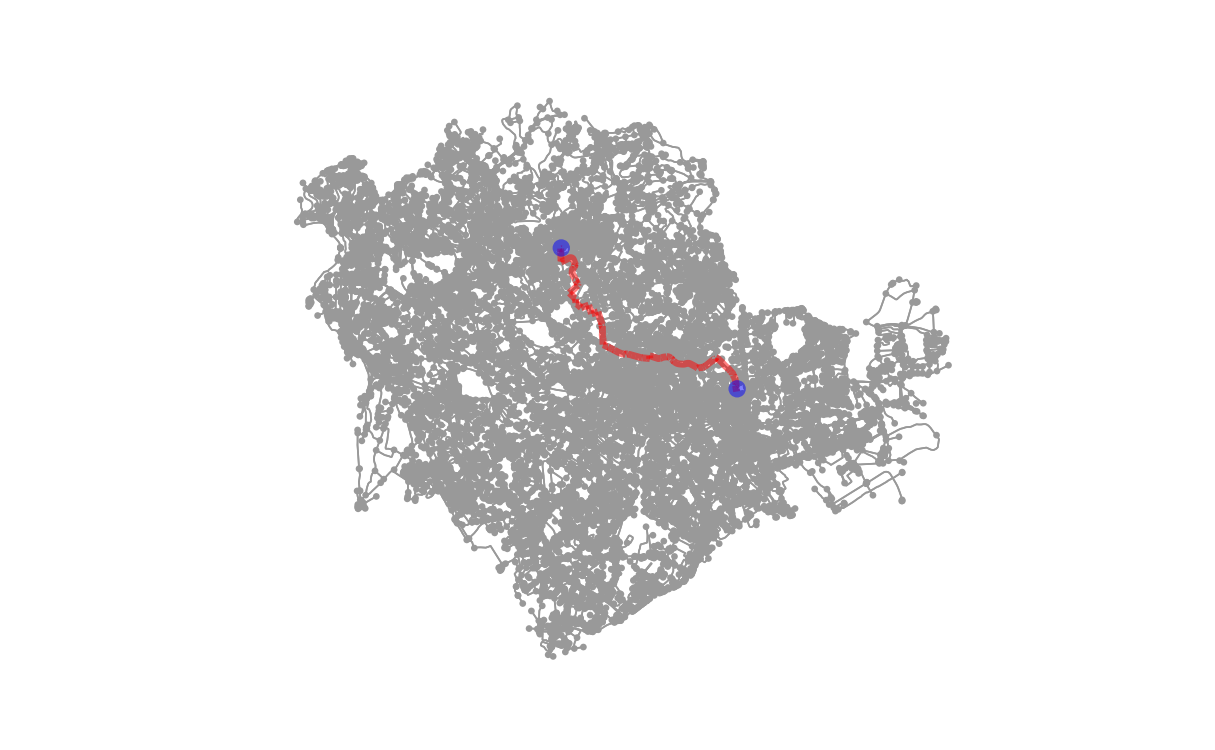

()

In [7]:
type_transport('walk')

In [ ]:
# the walking network for Montpellier, create network around point
G = ox.graph_from_place(
    'Montpellier, Hérault, France', network_type='walk')

# create network around point, define origin and destination nodes
origin_point = ox.geo_utils.geocode(
    'Maison du Lez, Montpellier, France')
destination_point = ox.geo_utils.geocode(
    'Place Eugène Bataillon, Montpellier, France')  # or define a lat-long point

# define origin/desination points then get the ID of the nodes nearest to each
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node)

# plot the route showing origin/destination lat-long points in blue
ox.plot_graph_route(G, route, origin_point=origin_point,
                    destination_point=destination_point)

In [ ]:
# widget of the type of transport
menu = [('car', 'drive'), ('bike', 'bike'), ('piedestrian', 'walk')]
interact(type_transport, transport=menu)

In [8]:
def animation_type_transport(transport):
    G = ox.graph_from_place(
        'Montpellier, Hérault, France', network_type=transport)
    origin_point = ox.geo_utils.geocode('Maison du Lez, Montpellier, France')
    origin_node = ox.get_nearest_node(G, origin_point)
    destination_point = ox.geo_utils.geocode(
        'Place Eugène Bataillon, Montpellier, France')
    destination_node = ox.get_nearest_node(G, destination_point)
    route = nx.shortest_path(G, origin_node, destination_node)

    fig, ax = ox.plot_graph_route(G, [origin_node])
    pic = ax.scatter(G.nodes[route[0]]['x'], G.nodes[route[0]]['y'], s=50, marker='*',
                     c='b', alpha=1, zorder=6)
    lc = LineCollection([], colors='r', linewidths=4, alpha=0.2, zorder=3)
    ax.add_collection(lc)

    def animate(i):
        pic.set_offsets([G.nodes[route[i+1]]['x'], G.nodes[route[i+1]]['y']])
        lines = ox.node_list_to_coordinate_lines(G, route[:i+1], True)
        lc.set_segments(lines)
        return pic, lc

    ani = animation.FuncAnimation(
        fig, animate, frames=200, interval=100, blit=True, repeat=False)
    plt.show()
    return(ani)

<IPython.core.display.Javascript object>


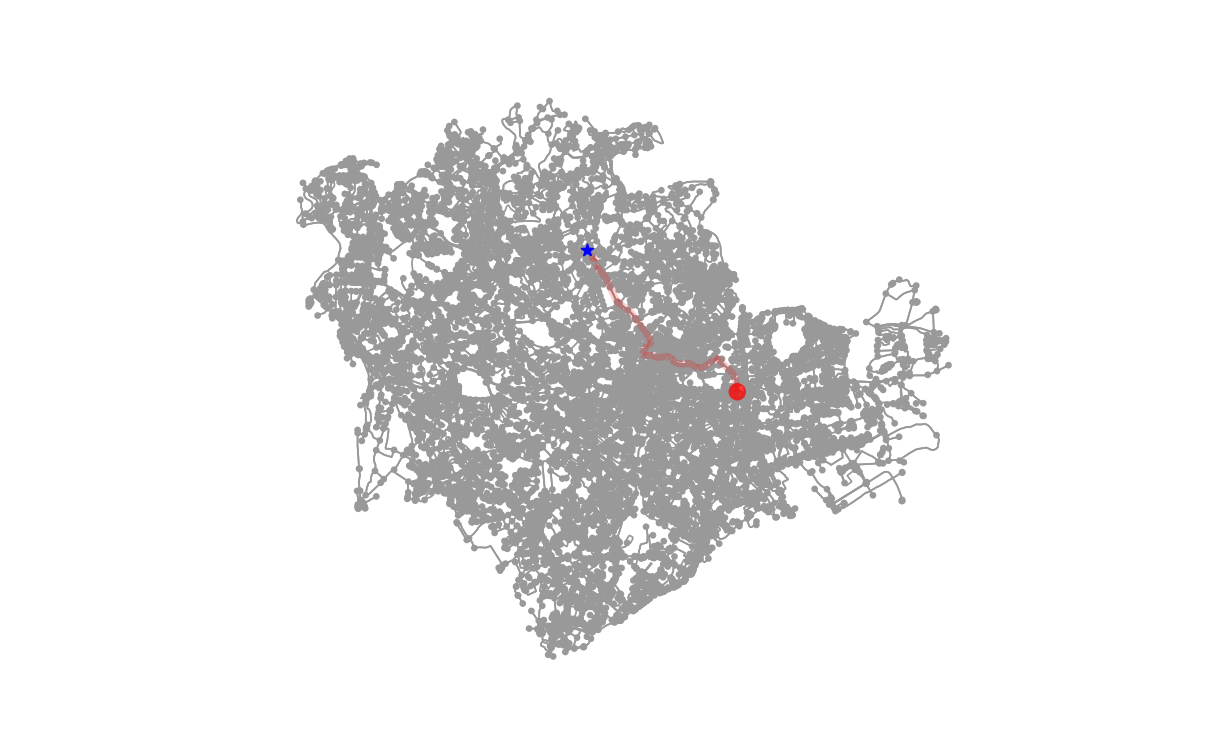

In [9]:
animation_type_transport('bike')